<h1>Session Three Assignment<h1>

#### Dataset
In this homework, we will continue the New York City Airbnb Open Data. You can take it from Kaggle or download from here if you don't want to sign up to Kaggle.

We'll keep working with the `'price'` variable, and we'll transform it to a classification task.

#### Features
    
For the rest of the homework, you'll need to use the features from the previous homework with additional two `'neighbourhood_group'` and `'room_type'`. So the whole feature set will be set as follows:

- 'neighbourhood_group',
- 'room_type',
-'latitude',
-'longitude',
-'price',
-'minimum_nights',
-'number_of_reviews',
-'reviews_per_month',
-'calculated_host_listings_count',
-'availability_365'

Select only them and fill in the missing values with 0.

In [1]:
# importing the required libriares
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# filtering out the columns to use
usecols = ['latitude',
           'longitude',
           'price',
           'minimum_nights',
           'number_of_reviews',
           'reviews_per_month',
           'calculated_host_listings_count',
           'availability_365',
           'neighbourhood_group',
           'room_type']

df = pd.read_csv('AB.csv', usecols=usecols)
df.head()

,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Manhattan,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,Manhattan,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,Brooklyn,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Manhattan,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


## Question 1
What is the most frequent observation (mode) for the column `'neighbourhood_group'?`

In [3]:
df.neighbourhood_group.mode()

0    Manhattan
Name: neighbourhood_group, dtype: object

In [4]:
df.describe(include=["O"])

,neighbourhood_group,room_type
count,48895,48895
unique,5,3
top,Manhattan,Entire home/apt
freq,21661,25409


## Question 2
1. Create the correlation matrix for the numerical features of your train dataset.   
        In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset.
2. What are the two features that have the biggest correlation in this dataset?

In [5]:
# the numerical data types
df_num = df[['latitude',
            'longitude',
            'price',
            'minimum_nights',
            'number_of_reviews',
            'reviews_per_month',
            'calculated_host_listings_count',
            'availability_365'
]]

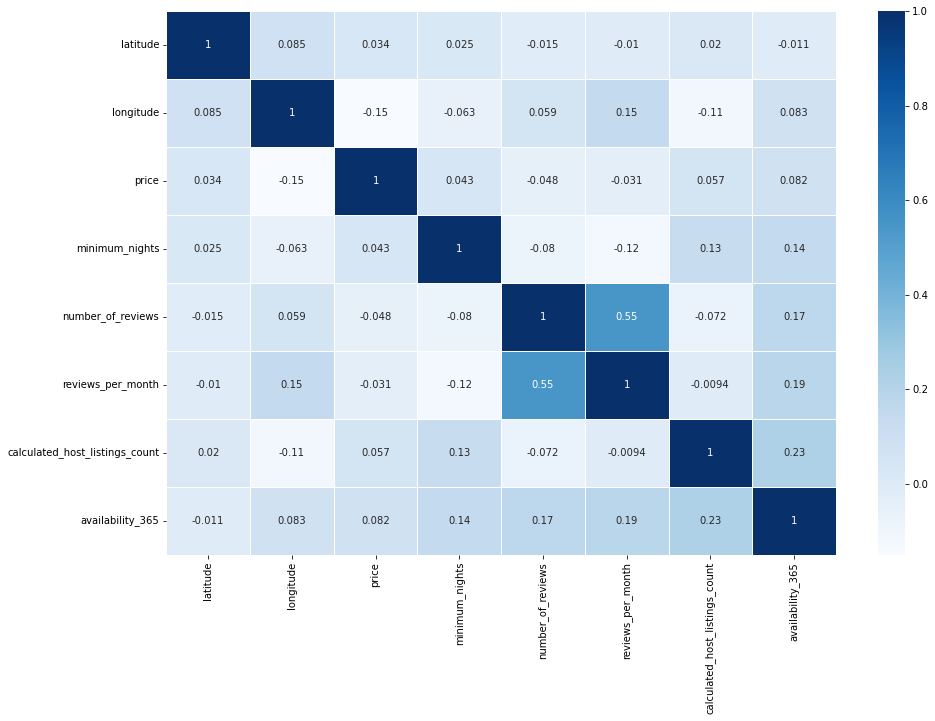

In [6]:
# plotting the correlation heatmap
plt.figure(figsize=(15,10))
sns_df = sns.heatmap(df_num.corr(), cmap="Blues", annot=True, linewidth=0.5)
plt.show()

In [7]:
# sorting the most corr
df_num.corr().unstack().sort_values(ascending = False)

latitude                        latitude                          1.000000
longitude                       longitude                         1.000000
calculated_host_listings_count  calculated_host_listings_count    1.000000
reviews_per_month               reviews_per_month                 1.000000
number_of_reviews               number_of_reviews                 1.000000
                                                                    ...   
calculated_host_listings_count  longitude                        -0.114713
minimum_nights                  reviews_per_month                -0.121702
reviews_per_month               minimum_nights                   -0.121702
price                           longitude                        -0.150019
longitude                       price                            -0.150019
Length: 64, dtype: float64

In [8]:
print('number_of_reviews and reviews_per_month')

number_of_reviews and reviews_per_month


In [9]:
# creating a copy of the original dataset
df_new = df.copy()


# price into binary with mean value as cutoff
mean = df_new['price'].mean()
df_new['above_average'] = np.where(df_new['price'] >= mean,1,0)


# dropping 'price', replaced by 'above average'
df_new.drop('price', axis=1)

,neighbourhood_group,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,above_average
0,Brooklyn,40.64749,-73.97237,Private room,1,9,0.21,6,365,0
1,Manhattan,40.75362,-73.98377,Entire home/apt,1,45,0.38,2,355,1
2,Manhattan,40.80902,-73.94190,Private room,3,0,NaN,1,365,0
3,Brooklyn,40.68514,-73.95976,Entire home/apt,1,270,4.64,1,194,0
4,Manhattan,40.79851,-73.94399,Entire home/apt,10,9,0.10,1,0,0
...,...,...,...,...,...,...,...,...,...,...
48890,Brooklyn,40.67853,-73.94995,Private room,2,0,NaN,2,9,0
48891,Brooklyn,40.70184,-73.93317,Private room,4,0,NaN,2,36,0
48892,Manhattan,40.81475,-73.94867,Entire home/apt,10,0,NaN,1,27,0
48893,Manhattan,40.75751,-73.99112,Shared room,1,0,NaN,6,2,0


In [10]:
# filling the nan values with zero's as instructed
df_new.fillna(0, inplace=True)
df_new.isnull().sum()

neighbourhood_group               0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
above_average                     0
dtype: int64

### Splitting the Data

Split the data
- Split your data in train/val/test sets, with 60%/20%/20% distribution.
- Use Scikit-Learn for that (the train_test_split function) and set the seed to 42.
- Make sure that the target value ('price') is not in your dataframe.

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
# spliting the data into 80% train, 20% test
df_full_train, df_test = train_test_split(df_new, test_size=0.2, random_state=42)

len(df_full_train), len(df_test)

(39116, 9779)

In [13]:
# splitting df_train,to 80% of it original 100% and give 20% to df_val
# 20% of df_train(80%) is 25%
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

len(df_train), len(df_val), len(df_test)

(29337, 9779, 9779)

In [14]:
# resetting the index
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [15]:
# creating the predicted values
y_train = df_train.above_average.values
y_val = df_val.above_average.values
y_test = df_test.above_average.values

In [16]:
df_train.shape, df_val.shape, df_test.shape, y_train.shape, y_val.shape, y_test.shape

((29337, 11), (9779, 11), (9779, 11), (29337,), (9779,), (9779,))

<h2>Question 3<h2>

Calculate the mutual information score with the (binarized) price for the two categorical variables that we have. Use the training set only.
- Which of these two variables has bigger score?
- Round it to 2 decimal digits using round(score, 2)

In [17]:
from sklearn.metrics import mutual_info_score

In [18]:
# why only these columns? remember, from the columns we have used early on....question 1 line[]
cat = ['neighbourhood_group', 'room_type']

In [19]:
def calculate_mi(series):
    return mutual_info_score(series, df_train.above_average)

df_mi = df_train[cat].apply(calculate_mi).round(2)
df_mi = df_mi.sort_values(ascending=False).to_frame(name='MI')

In [20]:
# room_type has the highest score
df_mi

,MI
room_type,0.14
neighbourhood_group,0.05


In [21]:
# remoing the predicting values from the df
df_train = df_train.drop('above_average', axis=1)
df_val = df_val.drop('above_average', axis=1)
df_test = df_test.drop('above_average', axis=1)

<h2>Question 4</h2>

- Now let's train a logistic regression
- Remember that we have two categorical variables in the data. Include them using one-hot encoding.
- Fit the model on the training dataset.
    To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:   
    `model = LogisticRegression(solver='lbfgs', C=1.0, random_state=42)`
- Calculate the accuracy on the validation dataset and round it to 2 decimal digits.

In [22]:
from sklearn.feature_extraction import DictVectorizer # OHE

In [23]:
num = ['latitude',
        'longitude',
        'minimum_nights',
        'number_of_reviews',
        'reviews_per_month',
        'calculated_host_listings_count',
        'availability_365'
      ]

cat = ['neighbourhood_group', 'room_type']

In [24]:
# OHE on df_train
train_dicts = df_train[cat + num].to_dict(orient='records')

dv = DictVectorizer(sparse=False)

X_train = dv.fit_transform(train_dicts)

In [25]:
# OHE on df_val
val_dicts = df_val[cat + num].to_dict(orient='records')

X_val = dv.fit_transform(val_dicts)

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [27]:
model = LogisticRegression(solver='lbfgs', C=1.0, random_state=42, max_iter=100)
model.fit(X_train, y_train)

C:\Users\adeju\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [28]:
# prediction with the df_val
y_pred = model.predict(X_val)

accuracy = np.round(accuracy_score(y_val, y_pred),2)
print(accuracy)

0.79


<h2>Question 5</h2>


- We have 9 features: 7 numerical features and 2 categorical. 
- Let's find the least useful one using the feature elimination technique.
- Train a model with all these features (using the same parameters as in Q4). 
- Now exclude each feature from this set and train a model without it. Record the accuracy for each model. 
- For each feature, calculate the difference between the original accuracy and the accuracy without the feature.
- Which of following feature has the smallest difference?
   * neighbourhood_group
   * room_type
   * number_of_reviews
   * reviews_per_month
* note: the difference doesn't have to be positive

In [29]:
features = cat + num

In [30]:
orig_score = accuracy

# I loop through all the columns
for c in features:
    subset = features.copy()
    subset.remove(c)
    
    train_dict = df_train[subset].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    dv.fit(train_dict)

    X_train = dv.transform(train_dict)

    model = LogisticRegression(solver='lbfgs', C=1.0, random_state=42, max_iter=4000)
    model.fit(X_train, y_train)

    val_dict = df_val[subset].to_dict(orient='records')
    X_val = dv.transform(val_dict)

    y_pred = model.predict(X_val)

    score = accuracy_score(y_val, y_pred)
    print(c, orig_score - score, score)
print()
print()
print('The lower the orig_score - score the lesser it importance')
print('number_of_reviews, has the lowest importance')

neighbourhood_group 0.04063912465487274 0.7493608753451273
room_type 0.051887718580632014 0.738112281419368
latitude -0.0011851927599958456 0.7911851927599959
longitude -0.0012874527047754825 0.7912874527047755
minimum_nights -0.005173330606401461 0.7951733306064015
number_of_reviews -0.0038439513242662926 0.7938439513242663
reviews_per_month -0.005786890275079171 0.7957868902750792
calculated_host_listings_count -0.005071070661621824 0.7950710706616219
availability_365 0.0032119848655282057 0.7867880151344718


The lower the orig_score - score the lesser it importance
number_of_reviews, has the lowest importance


<h2>Question 6</h2>

- For this question, we'll see how to use a linear regression model from Scikit-Learn
- We'll need to use the original column 'price'. Apply the logarithmic transformation to this column.
- Fit the Ridge regression model on the training data.
- This model has a parameter alpha. Let's try the following values: [0, 0.01, 0.1, 1, 10]
- Which of these alphas leads to the best RMSE on the validation set? Round your RMSE scores to 3 decimal digits.

If there are multiple options, select the smallest alpha.

In [31]:
# applying the log transformation on price
df['price'] = np.log1p(df.price)

In [32]:
# spliting the data into 80% train, 20% test
df_full_train, df_test = train_test_split(df_new, test_size=0.2, random_state=42)

# splitting df_ful_train,to 80% of it original 100% and give 20% to df_val
df_train, df_val = train_test_split(df_full_train, test_size=0.2, random_state=42)

In [33]:
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)

In [34]:
y_train = df_train.price.values
y_test = df_test.price.values
y_val = df_val.price.values

In [35]:
del df_train['price']
del df_test['price']
del df_val['price']

## Ridge Regression

In [36]:
# former was train_dicts.....do not confuse them
train_dict = df_train[cat + num].to_dict(orient='records')

In [37]:
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

X_train = dv.transform(train_dict)

val_dict = df_val[cat + num].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [38]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

In [39]:
for a in [0, 0.01, 0.1, 1, 10]:
    model = Ridge(alpha=a,random_state=42)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_val)
    
    score = np.sqrt(mean_squared_error(y_val, y_pred))
    
    print(a, round(score, 3))

0 210.886
0.01 210.887
0.1 210.887
1 210.888
10 210.936
